# Spearman's rank correlation coefficient

In [2]:
import pandas as pd

# read my data set

In [3]:
data_set= pd.read_csv("players.csv")
data_set

,player;age;height;nationality;position;value;games;minutes;goals;assists;crosses;tackles;pressures;blocks;touches;fouls;fouled;offsides;own goals;ball recoveries;saves;squad;Season;league;Attendance;games starts;passes completed;sca;gca;dribbles completed;pens won;goals against gk;shots on target against;CLBestScorer;cards yellow;shots total;LgRk;MP;W;D;L;GF;GA;Pts;CL;WinCL
0,Zouhair Feddal;30;192;Morocco;Defender;4000000...
1,Zlatan Ibrahimović;37;195;Sweden;Forward;35000...
2,Zinedine Ferhat;26;180;Algeria;Forward;2000000...
3,Zinédine Ould Khaled;19;195;France;Midfield;15...
4,Zeki Celik;22;180;Turkey;Defender;20000000;23;...
...,...
6819,Victor Osimhen;18;186;Niger;Forward;1000000;12...
6820,Renato Steffen;25;170;Switzerland;Forward;3500...
6821,Paul Jaeckel;19;189;Germany;Defender;5000;3;27...
6822,Paul Verhaegh;33;178;Netherlands;Defender;1000...


# Pre-Processing And Data Cleaning For Data set

In [35]:
print(data_set.columns)

Index(['player;age;height;nationality;position;value;games;minutes;goals;assists;crosses;tackles;pressures;blocks;touches;fouls;fouled;offsides;own goals;ball recoveries;saves;squad;Season;league;Attendance;games starts;passes completed;sca;gca;dribbles completed;pens won;goals against gk;shots on target against;CLBestScorer;cards yellow;shots total;LgRk;MP;W;D;L;GF;GA;Pts;CL;WinCL'], dtype='object')


# Drop Columns From DataSet

In [5]:
import pandas as pd

# Read the dataset from CSV file with semicolon delimiter
data_set = pd.read_csv('players.csv', delimiter=';')

# Drop the specified columns
columns_to_drop = ['assists','offsides','fouls','touches','crosses','blocks','tackles','pressures','value','minutes','fouled','own goals','ball recoveries','saves','squad','Season','league','Attendance','games starts', 'passes completed', 'sca', 'gca', 'dribbles completed', 'pens won', 'goals against gk', 'shots on target against', 'CLBestScorer', 'cards yellow', 'shots total', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'CL', 'WinCL']
data_set.drop(columns_to_drop, axis=1, inplace=True)

df=pd.DataFrame(data_set.head(10))
df

,player,age,height,nationality,position,games,goals
0,Zouhair Feddal,30,192.0,Morocco,Defender,17,1
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,18,10
2,Zinedine Ferhat,26,180.0,Algeria,Forward,26,3
3,Zinédine Ould Khaled,19,195.0,France,Midfield,1,0
4,Zeki Celik,22,180.0,Turkey,Defender,23,0
5,Zaydou Youssouf,20,182.0,France,Midfield,16,0
6,Zack Steffen,24,191.0,United States,Goalkeeper,17,0
7,Yvon Mvogo,25,186.0,Switzerland,Goalkeeper,2,0
8,Yves Bissouma,22,182.0,Mali,Midfield,22,1
9,Yuya Osako,29,182.0,Japan,Forward,28,8


In [6]:
print(data_set.columns)

Index(['player', 'age', 'height', 'nationality', 'position', 'games', 'goals'], dtype='object')


#  Visualization

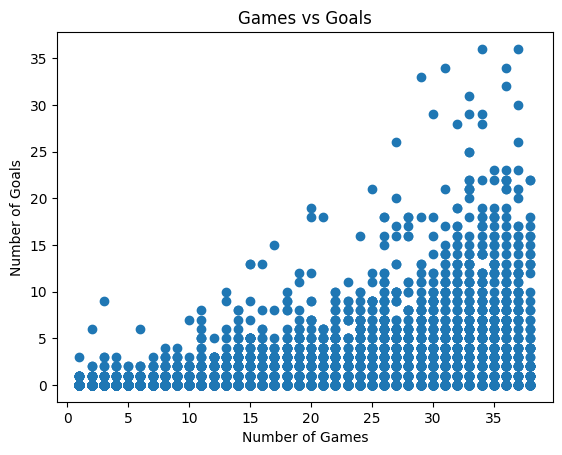

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame `df`
df = pd.DataFrame(data_set[['player', 'games', 'goals']])

# Extract the 'games' and 'goals' columns from the DataFrame
games = df['games']
goals = df['goals']

# Create the plot
plt.scatter(games, goals)
plt.xlabel('Number of Games')
plt.ylabel('Number of Goals')
plt.title('Games vs Goals')
plt.show()

# نلاحظ انه كلما زادت عدد المباريات زادت عدد الاهداف

#  Rank columns

We first need to rank the columns. That is assign the highest rank to the highest value up until the lowest value which will have lowest rank. We can do it using: `pandas.rank()` function.

In [7]:
df["games_rank"] = df["games"].rank()
df["goals_rank"] = df["goals"].rank()
df

,player,age,height,nationality,position,games,goals,games_rank,goals_rank
0,Zouhair Feddal,30,192.0,Morocco,Defender,17,1,4.5,6.5
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,18,10,6.0,10.0
2,Zinedine Ferhat,26,180.0,Algeria,Forward,26,3,9.0,8.0
3,Zinédine Ould Khaled,19,195.0,France,Midfield,1,0,1.0,3.0
4,Zeki Celik,22,180.0,Turkey,Defender,23,0,8.0,3.0
5,Zaydou Youssouf,20,182.0,France,Midfield,16,0,3.0,3.0
6,Zack Steffen,24,191.0,United States,Goalkeeper,17,0,4.5,3.0
7,Yvon Mvogo,25,186.0,Switzerland,Goalkeeper,2,0,2.0,3.0
8,Yves Bissouma,22,182.0,Mali,Midfield,22,1,7.0,6.5
9,Yuya Osako,29,182.0,Japan,Forward,28,8,10.0,9.0


# 2. Calculate $d^2$

In order to calculate $d^2$ we take the difference between the ranks of the two columns and then square the difference.

In [8]:
df["d"] = df["games_rank"] - df["goals_rank"]
df["d2"] = df["d"].apply(lambda x: x*x)
df

,player,age,height,nationality,position,games,goals,games_rank,goals_rank,d,d2
0,Zouhair Feddal,30,192.0,Morocco,Defender,17,1,4.5,6.5,-2.0,4.00
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,18,10,6.0,10.0,-4.0,16.00
2,Zinedine Ferhat,26,180.0,Algeria,Forward,26,3,9.0,8.0,1.0,1.00
3,Zinédine Ould Khaled,19,195.0,France,Midfield,1,0,1.0,3.0,-2.0,4.00
4,Zeki Celik,22,180.0,Turkey,Defender,23,0,8.0,3.0,5.0,25.00
5,Zaydou Youssouf,20,182.0,France,Midfield,16,0,3.0,3.0,0.0,0.00
6,Zack Steffen,24,191.0,United States,Goalkeeper,17,0,4.5,3.0,1.5,2.25
7,Yvon Mvogo,25,186.0,Switzerland,Goalkeeper,2,0,2.0,3.0,-1.0,1.00
8,Yves Bissouma,22,182.0,Mali,Midfield,22,1,7.0,6.5,0.5,0.25
9,Yuya Osako,29,182.0,Japan,Forward,28,8,10.0,9.0,1.0,1.00


# 3. Calculate Spearman's Rank Correlation Coefficient

We compute $\rho$ using the formula:

In [9]:
def spearman_rank(df):
    sum_d2 = sum(df["d2"])
    n = len(df["d2"])
    r = 1 - sum_d2*6/((n*n-1)*n)
    return r

r = spearman_rank(df)
print(f"Spearman's Rank Correlation Coefficient is: {r}")

Spearman's Rank Correlation Coefficient is: 0.6696969696969697


### Double check with `scipy`

In [10]:
from scipy import stats

stats.spearmanr(df["games"], df["goals"])

SignificanceResult(statistic=0.647470387829846, pvalue=0.04297338748282378)

معامل الارتباط قريب للواحد، التصنيف تم عملة للمقارنة بين المباريات والاهداف ،والمعدل يساوي تقريبا 0.7 يشير الى ان الارتباط بين المتغيرين عالي، بمعنى انه كلما زادت عدد المباريات زادت عدد الاهداف 